logistic regression model to determine the probability of a loan default. Use all of the variables.

In [1]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import tree
from sklearn.tree import _tree

In [3]:
INFILE = "C:\\Users\\aroon\\Desktop\\MSDS\\422\\MSDS422\\Unit 3\\ImputedDataset.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

In [4]:
df = pd.read_csv( INFILE )
dt = df.dtypes

df.head

<bound method NDFrame.head of       TARGET_BAD_FLAG  TARGET_LOSS_AMT   LOAN      MORTDUE         VALUE  \
0                   1            641.0   1100  25860.00000   39025.00000   
1                   1           1109.0   1300  70053.00000   68400.00000   
2                   1            767.0   1500  13500.00000   16700.00000   
3                   1           1425.0   1500  67858.02728   95919.28017   
4                   0              NaN   1700  97800.00000  112000.00000   
...               ...              ...    ...          ...           ...   
5955                0              NaN  88900  57264.00000   90185.00000   
5956                0              NaN  89000  54576.00000   92937.00000   
5957                0              NaN  89200  54045.00000   92924.00000   
5958                0              NaN  89800  50370.00000   91861.00000   
5959                0              NaN  89900  48811.00000   88934.00000   

       YOJ     DEROG  DELINQ       CLAGE      NINQ       

In [5]:
"""
SPLIT DATA
"""

X = df.copy()
X = X.drop( TARGET_F, axis=1 )
X = X.drop( TARGET_A, axis=1 )

Y = df[ [TARGET_F, TARGET_A] ]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=2)

In [6]:
F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

In [7]:
"""
MODEL ACCURACY METRICS AND FUNCTIONS
"""

def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]

def getTreeVars( TREE, varNames ) :    
    tree_ = TREE.tree_    
    varName = [ varNames[i] 
               if i != _tree.TREE_UNDEFINED 
               else "undefined!" 
               for i in tree_.feature ]    
    nameSet = set()    
    for i in tree_.feature :        
        if i != _tree.TREE_UNDEFINED :            
            nameSet.add( i )    
    nameList = list( nameSet )    
    parameter_list = list()    
    for i in nameList :        
        parameter_list.append( varNames[i] )    
    return parameter_list



def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nDEFAULT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )



def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nDEFAULT AMOUNT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )

Logistic Regression using All Variables

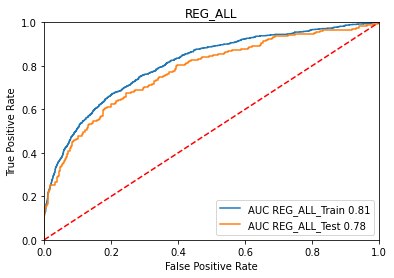

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.8401845637583892
REG_ALL_Test  =  0.8204697986577181
------




In [8]:
"""
REGRESSION ALL VARIABLES
"""

WHO = "REG_ALL"

BAD = LogisticRegression(solver= 'newton-cg' ,max_iter=10000,random_state =0)
BAD = BAD.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_BAD = getProbAccuracyScores( WHO + "_Train", BAD, X_train, Y_train[ TARGET_F ] )
TEST_BAD = getProbAccuracyScores( WHO + "_Test", BAD, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_BAD, TEST_BAD ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_BAD, TEST_BAD] )

Logistic regression with NO SOLVER PASSED - Default solver is lbfgs

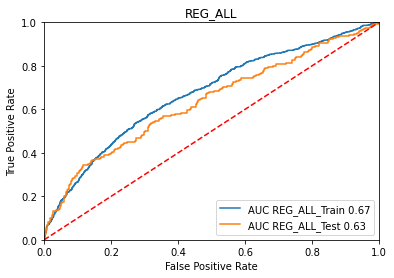

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.8047399328859061
REG_ALL_Test  =  0.7953020134228188
------




In [9]:
WHO = "REG_ALL"

BAD = LogisticRegression(max_iter=10000,random_state =0)
BAD = BAD.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_BAD = getProbAccuracyScores( WHO + "_Train", BAD, X_train, Y_train[ TARGET_F ] )
TEST_BAD = getProbAccuracyScores( WHO + "_Test", BAD, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_BAD, TEST_BAD ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_BAD, TEST_BAD] )



Logistic regression with SOLVER = SAGA  

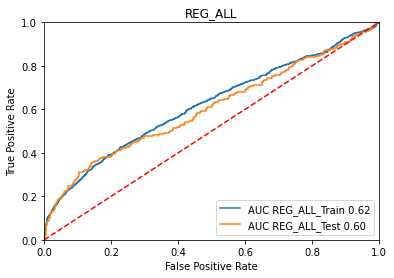

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.8026426174496645
REG_ALL_Test  =  0.7919463087248322
------




In [10]:
WHO = "REG_ALL"

BAD = LogisticRegression(solver= 'saga' ,max_iter=10000,random_state =0)
BAD = BAD.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_BAD = getProbAccuracyScores( WHO + "_Train", BAD, X_train, Y_train[ TARGET_F ] )
TEST_BAD = getProbAccuracyScores( WHO + "_Test", BAD, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_BAD, TEST_BAD ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_BAD, TEST_BAD] )



In [11]:
print("intercept ")
print(BAD.intercept_)
print("")
print("coefficients ")
print(BAD.coef_)

intercept 
[-4.9281903e-06]

coefficients 
[[-2.95544220e-05 -5.52899338e-06 -6.29390860e-07 -8.45292146e-05
   2.66105876e-05  4.35112795e-05 -2.04905741e-03  3.04108616e-05
  -2.16587065e-05 -3.33851050e-05 -8.35385684e-06 -1.65237665e-05]]


LOAN DEFAULT AMOUNT - REGRESSION for CONTINEOUS VARIABLE

In [12]:
# LOAN DEFAULT AMOUNT - REGRESSION for CONTINEOUS VARIABLE 

AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO+ "_Test", AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

REG_ALL_AMT_TRAIN = TRAIN_AMT.copy()
REG_ALL_AMT_TEST = TEST_AMT.copy()

REG_ALL_CLM = TEST_BAD.copy()
REG_ALL_AMT = TEST_AMT.copy()

REG_ALL RMSE ACCURACY
REG_ALL_Train  =  4331.5827819227125
REG_ALL_Test  =  5179.549674565408
------




DECISION TREE - ALL VARIABLES

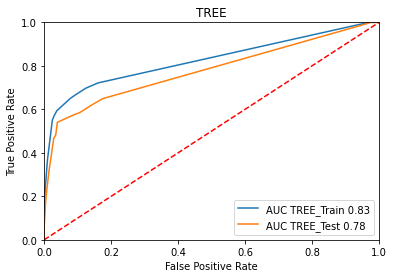

TREE CLASSIFICATION ACCURACY
TREE_Train  =  0.8917785234899329
TREE_Test  =  0.8649328859060402
------




In [13]:

# DECISION TREE - LOAN DEFAULT

WHO = "TREE"

BAD = tree.DecisionTreeClassifier(max_depth = 5 )
BAD = BAD.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_BAD = getProbAccuracyScores( WHO + "_Train", BAD, X_train, Y_train[ TARGET_F ] )
TEST_BAD = getProbAccuracyScores( WHO + "_Test", BAD, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_BAD, TEST_BAD ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_BAD, TEST_BAD ] )

feature_cols = list( X.columns.values )



In [14]:
# Decision Tree Regressor

WHO = "TREE"
AMT = tree.DecisionTreeRegressor( max_depth= 4 )
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols ) 
tree.export_graphviz(AMT,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

TREE_CLM = TRAIN_BAD.copy()
TREE_AMT = TEST_AMT.copy()


TREE RMSE ACCURACY
TREE_Train  =  4638.616383413549
TREE  =  6488.967497676028
------




LOGISTIC REGRESSION - Variable selection using Decision tree regressor

In [15]:
tree.export_graphviz(BAD,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )

vars_tree_flag = getTreeVars( BAD, feature_cols ) 
vars_tree_flag

['LOAN',
 'MORTDUE',
 'VALUE',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

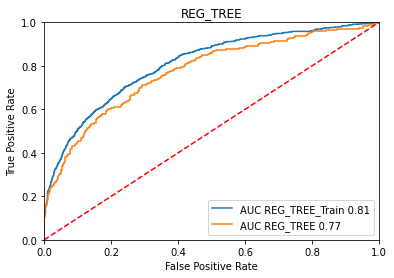

REG_TREE CLASSIFICATION ACCURACY
REG_TREE_Train  =  0.8395553691275168
REG_TREE  =  0.8204697986577181
------




In [16]:
# classification with DECISION TREE VARIABLE SELECTION


WHO = "REG_TREE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[vars_tree_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[vars_tree_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[vars_tree_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


In [17]:
# DEFAULT LOAN AMOUNT

AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

REG_TREE_CLM_COEF = getCoefLogit( CLM, X_train[vars_tree_flag] )
REG_TREE_AMT_COEF = getCoefLinear( AMT, X_train[vars_tree_amt] )
REG_TREE_CLM = TEST_CLM.copy()
REG_TREE_AMT = TEST_AMT.copy()


REG_TREE RMSE ACCURACY
REG_TREE_Train  =  4635.249443543957
REG_TREE  =  5584.618313871109
------



DEFAULT
---------
Total Variables:  10
INTERCEPT  =  -2.4838642985316013
LOAN  =  -2.3558124600401462e-05
MORTDUE  =  -4.029413128204013e-06
VALUE  =  3.318719694005823e-06
DEROG  =  0.6539139837448453
DELINQ  =  0.750328725736711
CLAGE  =  -0.0064059617083539275
NINQ  =  0.171228468467232
CLNO  =  -0.007883755906298353
DEBTINC  =  0.05409177612301314

DEFAULT AMOUNT
---------
Total Variables:  7
INTERCEPT  =  -3657.1979960157732
LOAN  =  0.7907283313181088
VALUE  =  -0.0027030822540060786
DEROG  =  370.3078970872183
CLAGE  =  -25.96577178395573
CLNO  =  271.26649202782176
DEBTINC  =  54.8024309827856


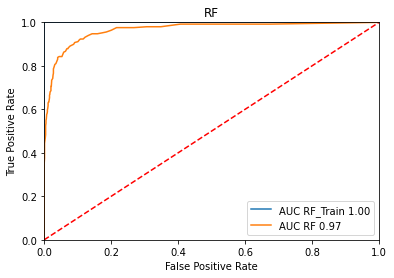

RF CLASSIFICATION ACCURACY
RF_Train  =  1.0
RF  =  0.9186241610738255
------




In [18]:
"""
RANDOM FOREST
"""

def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

WHO = "RF"

CLM = RandomForestClassifier()
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( CLM, feature_cols )


In [19]:
# LOAN AMOUNT 
WHO = "RF"

AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

##for i in vars_RF_amt :
##    print( i )


RF_CLM = TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()

RF RMSE ACCURACY
RF_Train  =  1334.8087624516656
RF  =  4100.179000889089
------







('DEBTINC', 100)
('DEROG', 60)
('DELINQ', 56)
('CLAGE', 54)
('LOAN', 50)



('LOAN', 100)


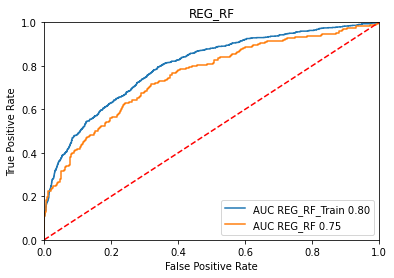

REG_RF CLASSIFICATION ACCURACY
REG_RF_Train  =  0.8389261744966443
REG_RF  =  0.8162751677852349
------




In [20]:
"""
REGRESSION RANDOM FOREST
"""

WHO = "REG_RF"


print("\n\n")
RF_flag = []
for i in vars_RF_flag :
    print(i)
    theVar = i[0]
    RF_flag.append( theVar )

print("\n\n")
RF_amt = []
for i in vars_RF_amt :
    print(i)
    theVar = i[0]
    RF_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=100)
CLM = CLM.fit( X_train[RF_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[RF_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[RF_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )



In [21]:
# LOAN AMOUNT DEFAULTED

AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[RF_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


REG_RF_CLM_COEF = getCoefLogit( CLM, X_train[RF_flag] )
REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )

REG_RF_CLM = TEST_CLM.copy()
REG_RF_AMT = TEST_AMT.copy()

REG_RF RMSE ACCURACY
REG_RF_Train  =  5695.777288305332
REG_RF  =  6766.612649679708
------



DEFAULT
---------
Total Variables:  6
INTERCEPT  =  -2.394075140050282
DEBTINC  =  0.055513765698846564
DEROG  =  0.6730135250726169
DELINQ  =  0.7367628389533996
CLAGE  =  -0.007068878377235118
LOAN  =  -1.9600467607392388e-05

DEFAULT AMOUNT
---------
Total Variables:  2
INTERCEPT  =  -22.690767519570727
LOAN  =  0.8085030550548837


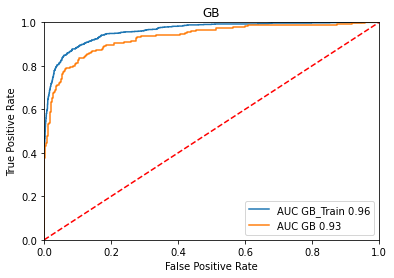

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9255453020134228
GB  =  0.9068791946308725
------




In [22]:
"""
GRADIENT BOOSTING
"""
WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1  )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )

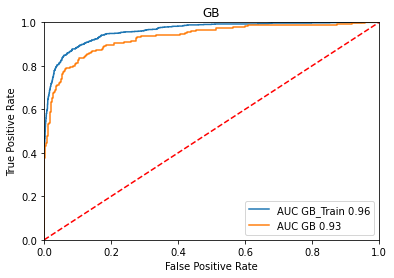

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9255453020134228
GB  =  0.9068791946308725
------




In [23]:
"""
GRADIENT BOOSTING
"""

WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1 , criterion='friedman_mse' )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )



In [24]:
# LOAN DEFAULT

WHO = "GB"
AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

##for i in vars_RF_amt :
##    print( i )

GB_CLM = TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()

GB RMSE ACCURACY
GB_Train  =  1385.3319847563162
GB  =  3452.460365194389
------







('DEBTINC', 100)
('DEROG', 58)
('DELINQ', 42)



('LOAN', 100)


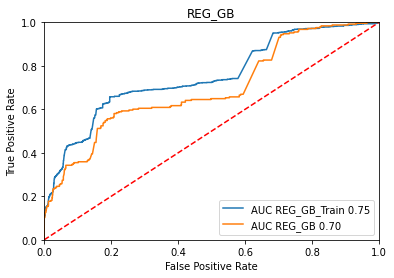

REG_GB CLASSIFICATION ACCURACY
REG_GB_Train  =  0.833263422818792
REG_GB  =  0.8187919463087249
------


REG_GB RMSE ACCURACY
REG_GB_Train  =  5695.777288305332
REG_GB  =  6766.612649679708
------



DEFAULT
---------
Total Variables:  4
INTERCEPT  =  -3.813940264599495
DEBTINC  =  0.052754243826506904
DEROG  =  0.7113969889459091
DELINQ  =  0.6921170848773278

DEFAULT AMOUNT
---------
Total Variables:  2
INTERCEPT  =  -22.690767519570727
LOAN  =  0.8085030550548837


In [25]:
"""
REGRESSION GRADIENT BOOSTING
"""

WHO = "REG_GB"


print("\n\n")
GB_flag = []
for i in vars_GB_flag :
    print(i)
    theVar = i[0]
    GB_flag.append( theVar )

print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    print(i)
    theVar = i[0]
    GB_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[GB_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[GB_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[GB_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# LOAN AMOUNT DEFAULTED

AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )

REG_GB_CLM = TEST_CLM.copy()
REG_GB_AMT = TEST_AMT.copy()





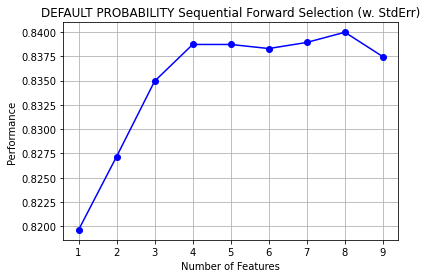

 ................... 
argmax
feature_names    (0, 2, 3, 4, 5, 6, 7, 8)
avg_score                        0.839975
Name: 8, dtype: object
 ................... 
('0', '2', '3', '4', '5', '6', '7', '8')
LOAN
VALUE
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


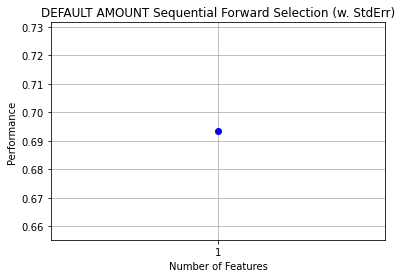

 ................... 
argmax
feature_names        (0,)
avg_score        0.693406
Name: 1, dtype: object
 ................... 
('0',)
LOAN


In [26]:
"""
REGRESSION STEPWISE
"""

U_train = X_train[ vars_tree_flag ]
stepVarNames = list( U_train.columns.values )
maxCols = U_train.shape[1]

sfs = SFS( LogisticRegression( solver='newton-cg', max_iter=100 ),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           cv=3
           )
sfs.fit(U_train.values, Y_train[ TARGET_F ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('DEFAULT PROBABILITY Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

U_train = X_train[ finalStepVars ]
U_test = X_test[ finalStepVars ]



V_train = W_train[ GB_amt ]
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv=5
           )
sfs.fit(V_train.values, Z_train[ TARGET_A ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('DEFAULT AMOUNT Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

V_train = W_train[ finalStepVars ]
V_test = W_test[ finalStepVars ]

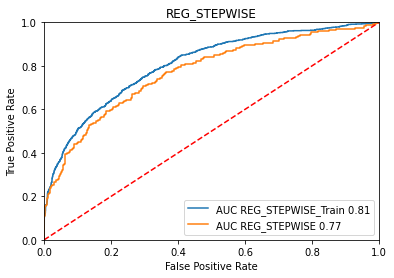

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.8408137583892618
REG_STEPWISE  =  0.8213087248322147
------


REG_STEPWISE RMSE ACCURACY
REG_STEPWISE_Train  =  5695.777288305332
REG_STEPWISE  =  6766.612649679708
------



DEFAULT
---------
Total Variables:  9
INTERCEPT  =  -2.4979950722832913
LOAN  =  -2.2747658826817084e-05
VALUE  =  8.436130081442413e-07
DEROG  =  0.6517494433480869
DELINQ  =  0.7519697356352874
CLAGE  =  -0.006389712212778107
NINQ  =  0.17015877191692033
CLNO  =  -0.009497833757192238
DEBTINC  =  0.05366637999682044

DEFAULT AMOUNT
---------
Total Variables:  2
INTERCEPT  =  -22.690767519570727
LOAN  =  0.8085030550548837


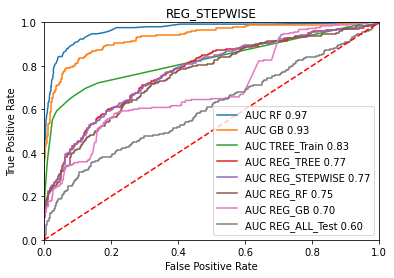

ALL CLASSIFICATION ACCURACY
RF  =  0.9186241610738255
GB  =  0.9068791946308725
TREE_Train  =  0.8917785234899329
REG_STEPWISE  =  0.8213087248322147
REG_TREE  =  0.8204697986577181
REG_GB  =  0.8187919463087249
REG_RF  =  0.8162751677852349
REG_ALL_Test  =  0.7919463087248322
------


ALL DAMAGE MODEL ACCURACY
GB  =  3452.460365194389
RF  =  4100.179000889089
REG_ALL_Test  =  5179.549674565408
REG_TREE  =  5584.618313871109
TREE  =  6488.967497676028
REG_RF  =  6766.612649679708
REG_GB  =  6766.612649679708
REG_STEPWISE  =  6766.612649679708
------




In [27]:
"""
REGRESSION 
"""

WHO = "REG_STEPWISE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( U_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# DEFAULT AMOUNT

AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_STEP_CLM_COEF = getCoefLogit( CLM, U_train )
REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_CLM = TEST_CLM.copy()
REG_STEP_AMT = TEST_AMT.copy()





In [29]:
# Tensor Flow

import tensorflow as tf


from sklearn.preprocessing import MinMaxScaler
theScaler = MinMaxScaler()
theScaler.fit( X_train )



def get_TF_ProbAccuracyScores( NAME, MODEL, X, Y ) :
    probs = MODEL.predict_proba( X )
    pred_list = []
    for p in probs :
        pred_list.append( np.argmax( p ) )
    pred = np.array( pred_list )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]


WHO = "Tensor_FLow"

U_train = theScaler.transform( X_train )
U_test = theScaler.transform( X_test )

U_train = pd.DataFrame( U_train )
U_test = pd.DataFrame( U_test )

U_train.columns = list( X_train.columns.values )
U_test.columns = list( X_train.columns.values )

U_train = U_train[ GB_flag ]
U_test = U_test[ GB_flag ]

In [30]:
F_theShapeSize = U_train.shape[1]
F_theActivation = tf.keras.activations.relu
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_theOptimizer = tf.keras.optimizers.Adam()
F_theEpochs = 100

#F_theUnits = int( 2*F_theShapeSize / 3 )
F_theUnits = int( 2*F_theShapeSize/3)

F_LAYER_01 = tf.keras.layers.Dense( units=F_theUnits, activation=F_theActivation, input_dim=F_theShapeSize )
F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
F_LAYER_02 = tf.keras.layers.Dense( units=F_theUnits, activation=F_theActivation )
F_LAYER_OUTPUT = tf.keras.layers.Dense( units=2, activation=tf.keras.activations.softmax )


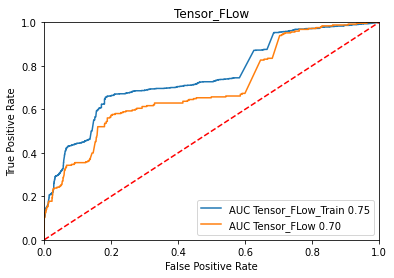

Tensor_FLow CLASSIFICATION ACCURACY
Tensor_FLow_Train  =  0.8322147651006712
Tensor_FLow  =  0.8179530201342282
------




In [31]:
CLM = tf.keras.Sequential()
CLM.add( F_LAYER_01 )
#CLM.add( F_LAYER_DROP )
#CLM.add( F_LAYER_02 )
CLM.add( F_LAYER_OUTPUT )
CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer)
CLM.fit( U_train, Y_train[TARGET_F], epochs=F_theEpochs, verbose=False )

TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

In [32]:
V_train = theScaler.transform( W_train )
V_test = theScaler.transform( W_test )

V_train = pd.DataFrame( V_train )
V_test = pd.DataFrame( V_test )

V_train.columns = list( W_train.columns.values )
V_test.columns = list( W_train.columns.values )

V_train = V_train[ GB_amt ]
V_test = V_test[ GB_amt ]

In [33]:
A_theShapeSize = V_train.shape[1]
A_theActivation = tf.keras.activations.relu
A_theLossMetric = tf.keras.losses.MeanSquaredError()
A_theOptimizer = tf.keras.optimizers.Adam()
A_theEpochs = 800

A_theUnits = int( 2*A_theShapeSize  )

A_LAYER_01 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation, input_dim=A_theShapeSize )
A_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
A_LAYER_02 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation )
A_LAYER_OUTPUT = tf.keras.layers.Dense( units=1, activation=tf.keras.activations.linear )

AMT = tf.keras.Sequential()
AMT.add( A_LAYER_01 )
AMT.add( A_LAYER_DROP )
AMT.add( A_LAYER_02 )
AMT.add( A_LAYER_OUTPUT )
AMT.compile( loss=A_theLossMetric, optimizer=A_theOptimizer)
AMT.fit( V_train, Z_train[TARGET_A], epochs=A_theEpochs, verbose=False )


TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

TF_CLM = TEST_CLM.copy()
TF_AMT = TEST_AMT.copy()

Tensor_FLow RMSE ACCURACY
Tensor_FLow_Train  =  17394.220321506426
Tensor_FLow  =  16568.406532640245
------




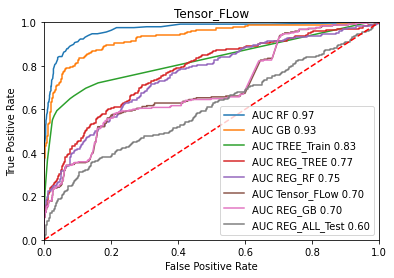

ALL CLASSIFICATION ACCURACY
RF  =  0.9186241610738255
GB  =  0.9068791946308725
TREE_Train  =  0.8917785234899329
REG_TREE  =  0.8204697986577181
REG_GB  =  0.8187919463087249
Tensor_FLow  =  0.8179530201342282
REG_RF  =  0.8162751677852349
REG_ALL_Test  =  0.7919463087248322
------


ALL DAMAGE MODEL ACCURACY
GB  =  3452.460365194389
RF  =  4100.179000889089
REG_ALL_Test  =  5179.549674565408
REG_TREE  =  5584.618313871109
TREE  =  6488.967497676028
REG_RF  =  6766.612649679708
REG_GB  =  6766.612649679708
Tensor_FLow  =  16568.406532640245
------




In [34]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, TF_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )



ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, TF_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL DAMAGE MODEL ACCURACY", ALL_AMT )

